## Business Understanding:
Richard sebagai online retailer ingin mengklasifikasi customer yang akan beli cepat, beli nanti, atau kapan-kapan. Dengan hal tersebut diharapkan dia dapat mengatur target pemasaran kepada customer yang tepat.

Supervised Learning - Klasifikasi

Kemungkinan Algoritma:
- Decision Tree
- Random Forest
- Logistic Regresion
- SVM

Variable Target: tablet_adoption

class:
1. Innovator
2. Early Adopter
3. Early Majority
4. Late Majority

#Data Understanding



In [ ]:
# library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/DataSource/Chapter10DataSet_Training.csv'
load_tablet_adoption = pd.read_csv(url)

In [ ]:
df = load_tablet_adoption.copy()
df

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Tablet_Adoption
0,9552,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority
...,...,...,...,...,...,...,...,...,...,...,...
656,8450,M,48,S,Frequent,Yes,Yes,Yes,Yes,Website Account,Late Majority
657,2048,F,32,M,Regular,Yes,No,Yes,No,Website Account,Early Adopter
658,9630,F,26,M,Seldom,Yes,No,Yes,Yes,Website Account,Early Majority
659,9982,F,55,S,Seldom,Yes,No,Yes,No,Monthly Billing,Early Adopter


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    661 non-null    int64 
 1   Gender                     661 non-null    object
 2   Age                        661 non-null    int64 
 3   Marital_Status             661 non-null    object
 4   Website_Activity           661 non-null    object
 5   Browsed_Electronics_12Mo   661 non-null    object
 6   Bought_Electronics_12Mo    661 non-null    object
 7   Bought_Digital_Media_18Mo  661 non-null    object
 8   Bought_Digital_Books       661 non-null    object
 9   Payment_Method             661 non-null    object
 10  Tablet_Adoption            661 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.9+ KB


Data tersebut banyak bertipe string, sehingga pada pengolahan data diperlukan proses labeling dengan encoder

In [ ]:
#cek target variabel
df['Tablet_Adoption'].value_counts()

Early Adopter     205
Early Majority    186
Late Majority     172
Innovator          98
Name: Tablet_Adoption, dtype: int64

In [ ]:
#Cek null value
df.isnull().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
Tablet_Adoption              0
dtype: int64

#Data Preparation

In [ ]:
#Label encoder library
from sklearn.preprocessing import LabelEncoder

#Membuat instance dari Labelencoder
label_encoder = LabelEncoder()

In [ ]:
df_input = pd.DataFrame({col : df[col].astype('category').cat.codes for col in df}, index=df.index)

In [ ]:
#Cek hasil encoder dari field target
df_input['Tablet_Adoption'].value_counts()

0    205
1    186
3    172
2     98
Name: Tablet_Adoption, dtype: int64

0 ----> Early Adopter

1 ----> Early Majority

3 ----> Late Majority

2 ----> Innovator

In [ ]:
df_input

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Tablet_Adoption
0,599,1,45,0,2,1,1,1,0,0,3
1,388,1,11,0,1,1,0,1,0,0,2
2,178,0,13,0,2,1,1,1,1,0,0
3,393,1,33,0,2,1,1,1,1,3,0
4,207,1,13,1,2,1,1,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...
656,511,1,32,1,0,1,1,1,1,3,3
657,70,0,16,0,1,1,0,1,0,3,0
658,603,0,10,0,2,1,0,1,1,3,1
659,634,0,39,1,2,1,0,1,0,2,0


In [ ]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   User_ID                    661 non-null    int16
 1   Gender                     661 non-null    int8 
 2   Age                        661 non-null    int8 
 3   Marital_Status             661 non-null    int8 
 4   Website_Activity           661 non-null    int8 
 5   Browsed_Electronics_12Mo   661 non-null    int8 
 6   Bought_Electronics_12Mo    661 non-null    int8 
 7   Bought_Digital_Media_18Mo  661 non-null    int8 
 8   Bought_Digital_Books       661 non-null    int8 
 9   Payment_Method             661 non-null    int8 
 10  Tablet_Adoption            661 non-null    int8 
dtypes: int16(1), int8(10)
memory usage: 7.9 KB


#Pemodelan Data

In [ ]:
#Split training dan testing library

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Evaluasi Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
df_input.isnull().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
Tablet_Adoption              0
dtype: int64

In [ ]:
#input variabel
x = df_input[['Gender',	'Age',	'Marital_Status',	'Website_Activity',	'Browsed_Electronics_12Mo',	'Bought_Electronics_12Mo',	'Bought_Digital_Media_18Mo',	'Bought_Digital_Books',	'Payment_Method']]


#Target Variable
y = df_input['Tablet_Adoption'].astype('category')

In [ ]:
#split testing dan training ----- supervised learning
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Import Library Decision Tree case klasifikasi

In [ ]:
#Membuat objek algoritma decision tree
tree = DecisionTreeClassifier()

#Memodelkan data menggunakan algoritma decision tree
model_tree = tree.fit(x_train, y_train)

#melakukan predict pada data test
pred_tree = model_tree.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56        46
           1       0.59      0.56      0.58        39
           2       0.45      0.53      0.49        19
           3       0.50      0.59      0.54        29

    accuracy                           0.55       133
   macro avg       0.54      0.55      0.54       133
weighted avg       0.56      0.55      0.55       133



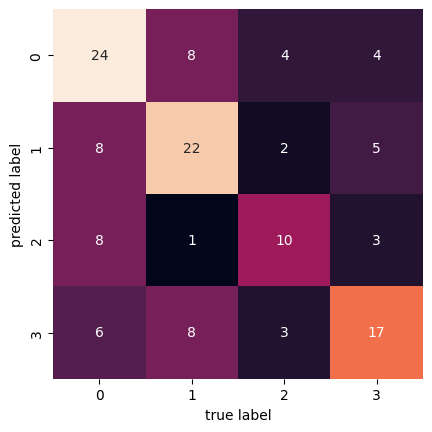

In [ ]:
# Visualize the confusion matrix of decision tree
mat = confusion_matrix (y_test, pred_tree)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<Axes: >

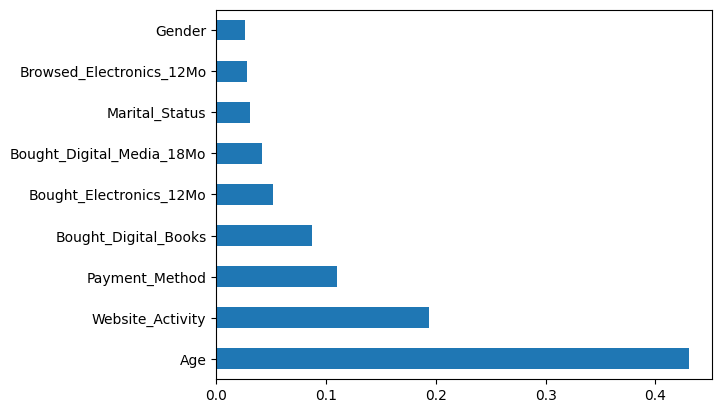

In [ ]:
#Signifikan faktor dari model tersebut yang menggambarkan nasabah gagal bayar atau tidak
feat_importances = pd.Series(model_tree.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

##K-Fold Validation

K-Fold Cross Validation adalah salah satu dari jenis cross validation yang berfungsi untuk menilai kinerja proses sebuah algoritma, dengan membagi sample data secara acak dan mengelompokan data tersebut sebanyak nilai K-Fold

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model_tree, x, y, cv=10, scoring='accuracy')

In [ ]:
scores

array([0.6119403 , 0.62121212, 0.40909091, 0.25757576, 0.46969697,
       0.62121212, 0.65151515, 0.62121212, 0.3030303 , 0.22727273])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.48 accuracy with a standard deviation of 0.16


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#Membuat objek algortima
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=6)

#Memodelkan data menggunakan algoritma
model_rf = clf_rf.fit(x_train, y_train)

#Melakukan predict pada data test
pred_rf = model_rf.predict(x_test)

#Evaluasi Random Forest

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        46
           1       0.70      0.41      0.52        39
           2       0.46      0.68      0.55        19
           3       0.64      0.79      0.71        29

    accuracy                           0.59       133
   macro avg       0.60      0.62      0.59       133
weighted avg       0.61      0.59      0.59       133



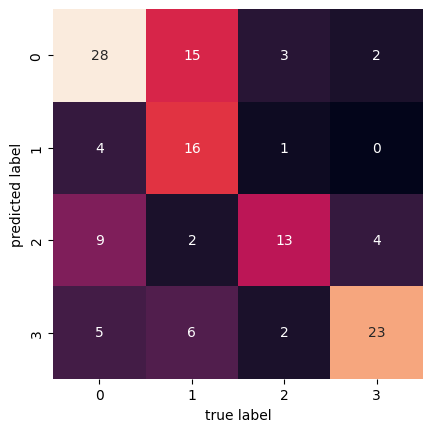

In [ ]:
# Visualize the confusion matrix of decision tree
mat = confusion_matrix (y_test, pred_rf)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<Axes: >

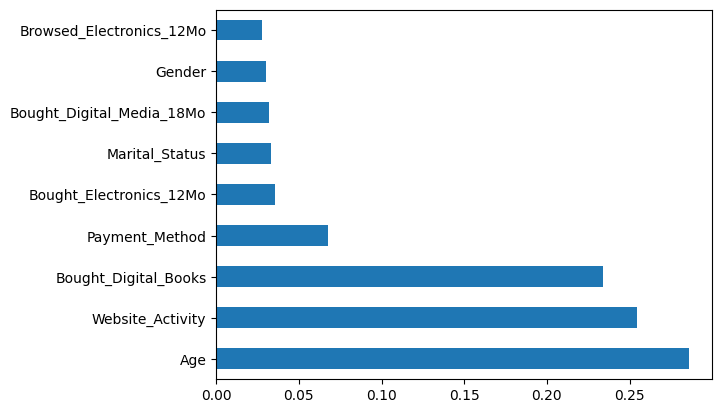

In [ ]:
#Signifikan faktor dari model tersebut yang menggambarkan nasabah gagal bayar atau tidak
feat_importances = pd.Series(model_rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
scores = cross_val_score(model_rf, x, y, cv=10, scoring='accuracy')

In [ ]:
scores

array([0.68656716, 0.68181818, 0.65151515, 0.66666667, 0.6969697 ,
       0.66666667, 0.77272727, 0.74242424, 0.3030303 , 0.22727273])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.61 accuracy with a standard deviation of 0.18


#XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Membuat objek algoritma XGBOOST klasifikasi
clf_xg = XGBClassifier()

In [ ]:
#Memodelkan data menggunakan algoritma XGBOOST
model_xg = clf_xg.fit(x_train, y_train)


In [ ]:
#Melakukan predict pada data test
pred_xg = model_xg.predict(x_test)

#Evaluasi XGBoost Classifier

In [ ]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50        46
           1       0.56      0.49      0.52        39
           2       0.43      0.53      0.48        19
           3       0.53      0.62      0.57        29

    accuracy                           0.52       133
   macro avg       0.51      0.53      0.52       133
weighted avg       0.52      0.52      0.52       133



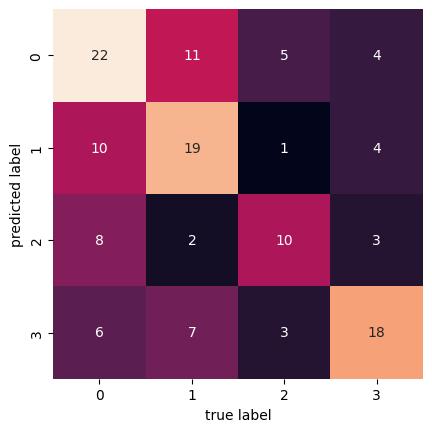

In [ ]:
# Visualize the confusion matrix of decision tree
mat = confusion_matrix (y_test, pred_xg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<Axes: >

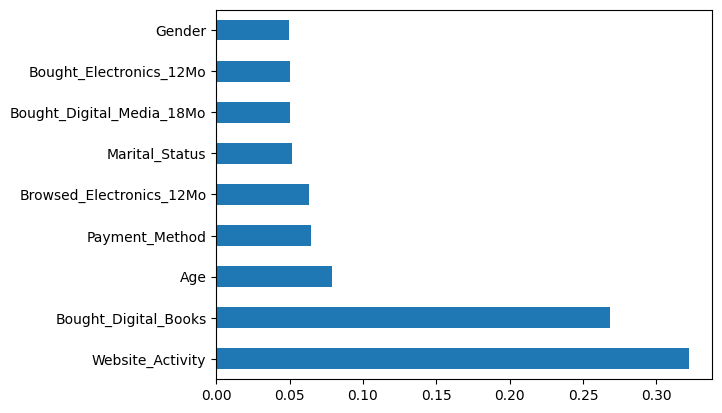

In [ ]:
#Signifikan faktor dari model tersebut yang menggambarkan nasabah gagal bayar atau tidak
feat_importances = pd.Series(model_xg.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
scores = cross_val_score(model_xg, x, y, cv=10, scoring='accuracy')

In [ ]:
scores

array([0.65671642, 0.72727273, 0.45454545, 0.28787879, 0.56060606,
       0.66666667, 0.75757576, 0.6969697 , 0.3030303 , 0.22727273])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.53 accuracy with a standard deviation of 0.19


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Membuat objek algoritma logistic regression
clf_lg = LogisticRegression()

#Memodelkan data menggunakan algoritma logistic regression
model_lg = clf_lg.fit(x_train, y_train)

#Melakukan predict pada data test
pred_lg = model_lg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
#Membuat objek algoritma logistic regression
clf_svm = SVC(kernel = 'linear', random_state=0)

#Memodelkan data menggunakan algoritma logistic regression
model_svm = clf_svm.fit(x_train, y_train)

#Melakukan predict pada data test
pred_svm = model_svm.predict(x_test)

#Evaluasi Support Vector Machine (SVM)

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.66      0.54      0.60        46
           1       0.58      0.38      0.46        39
           2       0.46      0.68      0.55        19
           3       0.56      0.79      0.66        29

    accuracy                           0.57       133
   macro avg       0.57      0.60      0.57       133
weighted avg       0.59      0.57      0.56       133



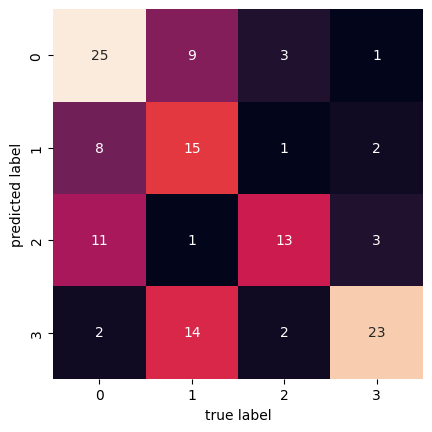

In [ ]:
# Visualize the confusion matrix of decision tree
mat = confusion_matrix (y_test, pred_svm)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
scores = cross_val_score(model_svm, x, y, cv=10, scoring='accuracy')

In [ ]:
scores

array([0.62686567, 0.6969697 , 0.72727273, 0.77272727, 0.66666667,
       0.62121212, 0.75757576, 0.59090909, 0.3030303 , 0.22727273])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.60 accuracy with a standard deviation of 0.18


In [ ]:
#Load data nasabah baru/calon nasabah yang mengajukan kredit
url2 ='/content/drive/MyDrive/DataSource/Chapter10DataSet_Scoring.csv'
df_load_data_2 = pd.read_csv(url2)

#data frame
df_new = df_load_data_2.copy()

In [ ]:
df_new

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method
0,56031,M,57,S,Regular,Yes,Yes,Yes,Yes,Bank Transfer
1,25913,F,51,M,Regular,Yes,Yes,No,No,Bank Transfer
2,19396,M,41,M,Seldom,Yes,Yes,Yes,No,Website Account
3,93666,M,66,S,Regular,Yes,Yes,Yes,Yes,Credit Card
4,72282,F,31,S,Seldom,Yes,No,Yes,No,Website Account
...,...,...,...,...,...,...,...,...,...,...
468,45102,M,60,S,Seldom,Yes,No,Yes,Yes,Bank Transfer
469,96393,F,24,S,Seldom,Yes,No,No,No,Credit Card
470,40897,M,23,M,Regular,Yes,Yes,Yes,Yes,Website Account
471,23653,F,36,S,Seldom,Yes,No,Yes,No,Bank Transfer


In [ ]:
df_input = pd.DataFrame({col : df_new[col].astype('category').cat.codes for col in df_new}, index=df_new.index)

In [ ]:
x2 = df_input[['Gender',	'Age',	'Marital_Status',	'Website_Activity',	'Browsed_Electronics_12Mo',	'Bought_Electronics_12Mo',	'Bought_Digital_Media_18Mo',	'Bought_Digital_Books',	'Payment_Method']]

In [ ]:
#predict menggunakan model SVM
prediction_rf = model_rf.predict(x2)

In [ ]:
prediction_rf

array([2, 0, 3, 2, 3, 1, 3, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 3, 3, 0, 3, 0,
       0, 3, 1, 3, 2, 0, 0, 2, 2, 0, 0, 3, 3, 1, 0, 1, 3, 3, 0, 0, 1, 0,
       0, 0, 3, 3, 0, 2, 2, 0, 2, 0, 3, 0, 3, 2, 3, 3, 3, 3, 0, 1, 0, 1,
       0, 3, 3, 0, 0, 2, 3, 3, 1, 2, 3, 3, 0, 2, 3, 3, 3, 0, 0, 0, 3, 0,
       0, 0, 0, 1, 0, 3, 1, 2, 2, 3, 3, 2, 3, 0, 3, 0, 2, 3, 1, 0, 3, 1,
       3, 1, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 2, 3, 1, 1, 1, 3,
       2, 0, 0, 3, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 3, 0, 3, 3, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 1, 2, 1, 3, 0, 3, 0, 0, 3, 0, 2, 0, 0, 1, 3, 0,
       0, 0, 3, 1, 3, 3, 3, 1, 1, 0, 0, 3, 0, 3, 0, 3, 1, 3, 0, 1, 2, 3,
       0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 3, 0, 2, 0, 0, 3,
       3, 1, 0, 1, 3, 0, 3, 0, 3, 2, 1, 0, 3, 0, 0, 3, 0, 0, 3, 3, 2, 3,
       3, 3, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 2, 1, 3, 1, 2, 0, 0, 2, 3,
       3, 2, 3, 0, 2, 2, 3, 3, 3, 0, 1, 2, 0, 3, 0, 0, 0, 3, 2, 2, 1, 0,
       0, 3, 1, 0, 3, 0, 0, 1, 2, 3, 0, 3, 0, 1, 2,

In [ ]:
df_pred = pd.DataFrame({'prediction' : prediction_rf})
df_pred.head()

,prediction
0,2
1,0
2,3
3,2
4,3


In [ ]:
def tablet_adoption(prediction):
  if prediction == 0:
    return 'Early Adopter'
  elif prediction == 1:
    return 'Early Majority'
  elif prediction ==2:
    return 'Innovator'
  else:
    return 'Late Majority'

0 ----> Early Adopter

1 ----> Early Majority

3 ----> Late Majority

2 ----> Innovator

In [ ]:
df_pred['prediction'] = df_pred['prediction'].apply(tablet_adoption)

In [ ]:
df_pred

,prediction
0,Innovator
1,Early Adopter
2,Late Majority
3,Innovator
4,Late Majority
...,...
468,Early Majority
469,Early Majority
470,Innovator
471,Late Majority


In [ ]:
df_new

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method
0,56031,M,57,S,Regular,Yes,Yes,Yes,Yes,Bank Transfer
1,25913,F,51,M,Regular,Yes,Yes,No,No,Bank Transfer
2,19396,M,41,M,Seldom,Yes,Yes,Yes,No,Website Account
3,93666,M,66,S,Regular,Yes,Yes,Yes,Yes,Credit Card
4,72282,F,31,S,Seldom,Yes,No,Yes,No,Website Account
...,...,...,...,...,...,...,...,...,...,...
468,45102,M,60,S,Seldom,Yes,No,Yes,Yes,Bank Transfer
469,96393,F,24,S,Seldom,Yes,No,No,No,Credit Card
470,40897,M,23,M,Regular,Yes,Yes,Yes,Yes,Website Account
471,23653,F,36,S,Seldom,Yes,No,Yes,No,Bank Transfer


In [ ]:
#Menggabungkan kolom hasil dengan data
df_hasil = pd.concat([df_new, df_pred], sort=True, axis=1)

In [ ]:
df_hasil

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,prediction
0,56031,M,57,S,Regular,Yes,Yes,Yes,Yes,Bank Transfer,Innovator
1,25913,F,51,M,Regular,Yes,Yes,No,No,Bank Transfer,Early Adopter
2,19396,M,41,M,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority
3,93666,M,66,S,Regular,Yes,Yes,Yes,Yes,Credit Card,Innovator
4,72282,F,31,S,Seldom,Yes,No,Yes,No,Website Account,Late Majority
...,...,...,...,...,...,...,...,...,...,...,...
468,45102,M,60,S,Seldom,Yes,No,Yes,Yes,Bank Transfer,Early Majority
469,96393,F,24,S,Seldom,Yes,No,No,No,Credit Card,Early Majority
470,40897,M,23,M,Regular,Yes,Yes,Yes,Yes,Website Account,Innovator
471,23653,F,36,S,Seldom,Yes,No,Yes,No,Bank Transfer,Late Majority


In [ ]:
df_hasil['prediction'].value_counts()

Early Adopter     183
Late Majority     139
Early Majority     79
Innovator          72
Name: prediction, dtype: int64

Dari hasil tersebut, didapat bahwa Early Adopter ada 183 data, Late Majority ada 139 data, Early Majority ada 79 data, dan Innovator ada 72 data

In [ ]:
#export to excel
from google.colab import files

#menyimpan file / export ke lokal dengan output excel
df_hasil.to_excel('Klasterilisasi customer pada penjualan.xlsx')
files.download('Klasterilisasi customer pada penjualan.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#export to excel
from google.colab import files

#menyimpan file / export ke lokal dengan output excel
df_hasil.to_csv('Klasterilisasi customer pada penjualan.csv')
files.download('Klasterilisasi customer pada penjualan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Menggunakan label encoder